In [358]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline

<h2> Task 1: Import data into Python environment.</h2>

In [515]:
df_comcast_consumer_complaints = pd.read_csv("../Dataset/Comcast_telecom_complaints_data.csv")

In [516]:
#view top 5 records
df_comcast_consumer_complaints.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [361]:
df_comcast_consumer_complaints.describe()

,Zip code
count,2224.000000
mean,47994.393435
std,28885.279427
min,1075.000000
25%,30056.500000
50%,37211.000000
75%,77058.750000
max,99223.000000


In [362]:
#check the dataframe size
df_comcast_consumer_complaints.size

24464

In [695]:
#Clean data: merge District Of Columbia and District of Columbia data
df_comcast_consumer_complaints['State'] =df_comcast_consumer_complaints['State'].apply(lambda x: 'District of Columbia' if x=='District Of Columbia'  else x)
#check data
df_comcast_consumer_complaints[df_comcast_consumer_complaints['State'] =='District of Columbia'].describe()

,Zip code
count,17.000000
mean,20016.588235
std,13.915184
min,20001.000000
25%,20003.000000
50%,20013.000000
75%,20026.000000
max,20037.000000


<h2>Task 2: Provide the trend chart for the number of complaints at monthly and daily granularity levels.</h2>

<h3>Number of Complaints per Day</h3>

In [696]:
#get daily complaint counts
df_daily_complaints = df_comcast_consumer_complaints.groupby(['Date'],as_index=False).agg(['mean','count']).reset_index()
df_daily_complaints.head()

Date      Zip code      
                     mean count
0  04-01-15  41808.111111    18
1  04-02-15  51878.703704    27
2  04-03-15  50994.733333    15
3  04-04-15  56334.833333    12
4  04-05-15  67932.666667     6

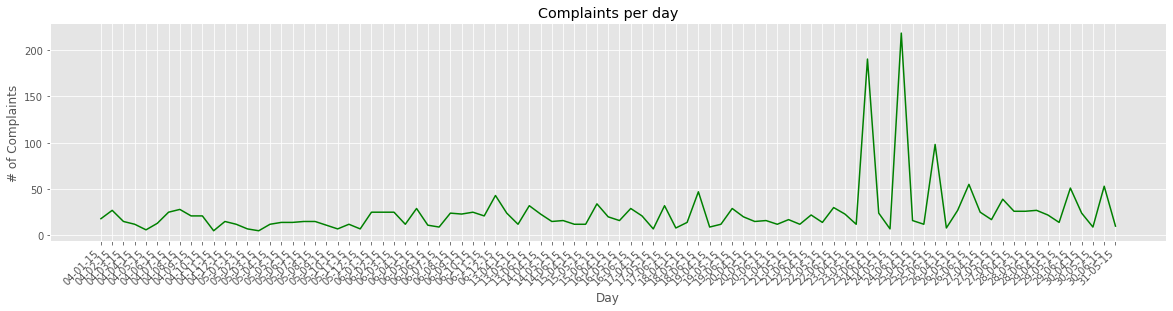

In [697]:
x_axis_data = df_daily_complaints.iloc[:, 0]
y_axis_data =df_daily_complaints.iloc[:, 2]

style.use('ggplot')
plt.figure(figsize=(20,4))
#plt.axis([6.5,17.5,50,2000])
plt.xticks(rotation=45, ha="right")
plt.plot(x_axis_data,y_axis_data,'g',linewidth=1.5)
plt.title('Complaints per day')
plt.xlabel('Day')
plt.ylabel('# of Complaints')
plt.show()


<h3>Number of Complaints per Month</h3>

In [698]:
#define a function to get month from a date
import datetime
def getMonth(date):
    return  datetime.datetime.strptime(date, "%d-%m-%y").month


In [699]:
#test the function
getMonth('31-03-15')

3

In [700]:
df_comcast_consumer_complaints['Month_of_date']=df_comcast_consumer_complaints['Date'].apply(getMonth)
df_comcast_consumer_complaints.head(2)

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Ticket_Status,Complaint_Type,Month_of_date
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,Closed,Internet,4
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,Closed,Other,8


In [701]:
#get monthly complaint counts
df_monthly_complaints = df_comcast_consumer_complaints.groupby(["Month_of_date"],as_index=False).agg(['mean', 'count']).reset_index()
df_monthly_complaints.head(2)

Month_of_date      Zip code      
                         mean count
0             1  45154.890909    55
1             2  51229.661017    59

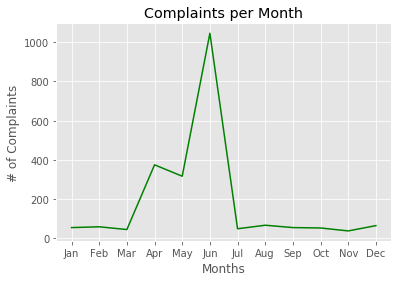

In [725]:
#plot graph
import calendar
x_axis_data = df_monthly_complaints.iloc[:, 0].apply(lambda x: calendar.month_abbr[x])
y_axis_data =df_monthly_complaints.iloc[:, 2]
style.use("ggplot")
plt.plot(x_axis_data,y_axis_data,'g',linewidth=1.5)
plt.xlabel('Months')
plt.ylabel('# of Complaints')
plt.title('Complaints per Month')
plt.show()

<h2>Task 3: Provide a table with the frequency of complaint types.<br>
Which complaint types are maximum i.e., around internet, network issues, or across any other domains.</h2>

In [722]:
df_comcast_consumer_complaints.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Ticket_Status,Complaint_Type,Month_of_date
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,Closed,Internet,4
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,Closed,Other,8
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,Closed,Network,4
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,Open,Other,7
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,Closed,Other,5


In [704]:
#Import necessary Libraries
import string
from nltk.corpus import stopwords

In [705]:
#define a function to get rid of stopwords present in the messages
def message_text_process(mess):
    no_punctuation=[char for char in mess if char not in string.punctuation]
    no_punctuation =''.join(no_punctuation)
    return ["""'""" + word +"""'""" for word in no_punctuation.split() if word not in stopwords.words('english') ]

In [706]:
#verify that function is working
df_complaints_types= df_comcast_consumer_complaints
df_complaints_types['Customer Complaint'].head(5).apply(message_text_process)

0           ['Comcast', 'Cable', 'Internet', 'Speeds']
1    ['Payment', 'disappear', 'service', 'got', 'di...
2                                 ['Speed', 'Service']
3    ['Comcast', 'Imposed', 'New', 'Usage', 'Cap', ...
4            ['Comcast', 'working', 'service', 'boot']
Name: Customer Complaint, dtype: object

In [707]:
#apply the function on the dataframe
df['Customer Complaint']=df_complaints_types['Customer Complaint'].apply(message_text_process)

In [708]:
df.head()

Complaint_Type
Internet                                                            532
Network                                                             233
Other                                                              1459
Customer Complaint    0              ['Comcast', 'Cable', 'Internet'...
Name: Ticket #, dtype: object

In [709]:
def TypeOfIssue(mylist):
   # mylist = mylist.apply(lambda s:s.lower() if type(s) == str else s)
    mylist=mylist.lower()
    if mylist.count('internet') >0:
        return 'Internet'
    elif mylist.count('network')>0 or mylist.count('bandwidth')>0 or mylist.count('data cap')>0 or mylist.count('speed')>0:
        return 'Network'
    else:
        return 'Other'

In [710]:
#verify Function
IsInternetIssue(['Comcast', 'Cable', 'Internet', 'Speeds'])

'Internet'

In [723]:
df_complaints_types['Complaint_Type'] = df_complaints_types['Customer Complaint'].apply(TypeOfIssue)
df_complaints_types.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Ticket_Status,Complaint_Type,Month_of_date
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,Closed,Internet,4
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,Closed,Other,8
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,Closed,Network,4
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,Open,Other,7
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,Closed,Other,5


In [712]:
#df_complaints_types.groupby(['Complaint_Type'],as_index=False).agg({"Total":'size'})
df = df_complaints_types.groupby('Complaint_Type')['Ticket #'].count()
df

Complaint_Type
Internet     532
Network      233
Other       1459
Name: Ticket #, dtype: int64

In [713]:
# Data Insight:
# Which complaint types are maximum? : Other
df.idxmax()

'Other'

<h2>Task 4: Create a new categorical variable with value as Open and Closed.
    <br>
(Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.)</h2>

In [714]:
#define a function
def openclose(val):
    if(val.lower()=='open' or val.lower()=='pending'):
        return 'Open'
    else:
        return 'Closed'
    

In [715]:
df_comcast_consumer_complaints['Ticket_Status']=df_comcast_consumer_complaints['Status'].apply(openclose)
df_comcast_consumer_complaints.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Ticket_Status,Complaint_Type,Month_of_date
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,Closed,Internet,4
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,Closed,Other,8
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,Closed,Network,4
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,Open,Other,7
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,Closed,Other,5


<h2>Task 5: Provide state wise status of complaints in a stacked bar chart. <br>
Use the categorized variable from Q3. <br><br>
Provide insights on:<br>
1-Which state has the maximum complaints<br>
2-Which state has the highest percentage of unresolved complaints</h2>

In [716]:
df = (df_comcast_consumer_complaints.assign(
            A=(df_comcast_consumer_complaints['Ticket_Status']== 'Open')
        )
        .groupby(['State'])['A']
        .agg([('Open','sum'),('Total','size')])
        .astype(int)
        .reset_index())
df= df.assign(Closed=(df['Total']-df['Open']))
#print(df.iloc[:,0])
df=df.assign(PercentOpen = ((df['Open']/df['Total'])*100))
df.head(5)

,State,Open,Total,Closed,PercentOpen
0,Alabama,9,26,17,34.615385
1,Arizona,6,20,14,30.000000
2,Arkansas,0,6,6,0.000000
3,California,61,220,159,27.727273
4,Colorado,22,80,58,27.500000


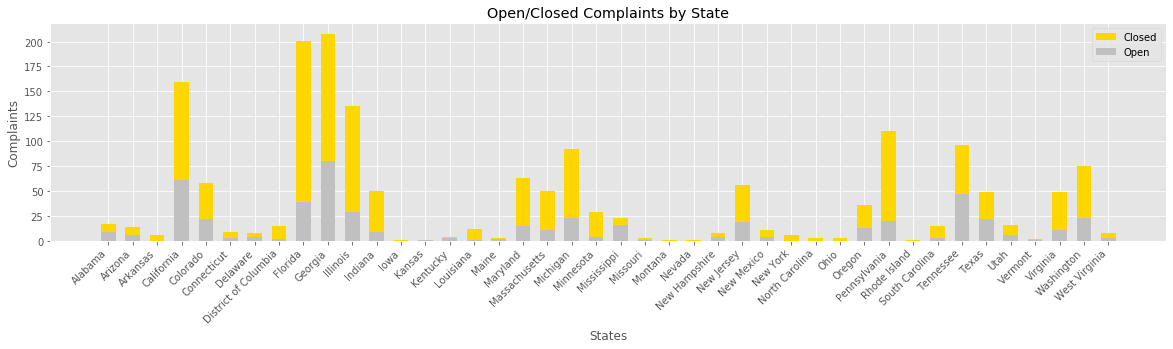

In [717]:
#Plot Graph
states=np.array(df.iloc[:,0])
closed_complaints = np.array(df.iloc[:,3])
Open_complaints = np.array(df.iloc[:,1])

style.use('ggplot')
plt.figure(figsize=(20,4))
plt.bar(states, closed_complaints, width=0.6, label='Closed', color='gold')
plt.bar(states, Open_complaints, width=0.6, label='Open', color='silver')
 
plt.xticks(states, states)
plt.xticks(rotation=45, ha="right")
plt.ylabel("Complaints")
plt.xlabel("States")
plt.legend(loc="upper right")
plt.title("Open/Closed Complaints by State")
plt.show()

In [718]:
#Data Insight:
#The state with maximun complaints : Georgia
print("The state with maximun complaints:")
print(df.loc[df['Total'].idxmax()])

#The state with highest percentage of unresolved Complaints: Kansas
print("\nThe state with highest percentage of unresolved Complaints:")
print(df.loc[df['PercentOpen'].idxmax()])

The state with maximun complaints:
State          Georgia
Open                80
Total              288
Closed             208
PercentOpen    27.7778
Name: 9, dtype: object

The state with highest percentage of unresolved Complaints:
State          Kansas
Open                1
Total               2
Closed              1
PercentOpen        50
Name: 13, dtype: object


<h2> Task 6: Provide a table with the frequency of complaint types.<br>
 Which complaint types are maximum i.e., around internet, network issues, or across any other domains.</h2>

In [719]:
df_comcast_consumer_complaints.head(2)

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Ticket_Status,Complaint_Type,Month_of_date
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,Closed,Internet,4
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,Closed,Other,8


In [720]:
#Create a new dataframe of Received Via and Ticket_Status columns
df_complaints_ReceivedBy=df_comcast_consumer_complaints[['Received Via','Ticket_Status']]
df_complaints_ReceivedBy.head(2)

,Received Via,Ticket_Status
0,Customer Care Call,Closed
1,Internet,Closed


In [721]:
#df_complaints_ReceivedBy.groupby(['Received Via'],as_index=False).describe()

df = (df_complaints_ReceivedBy.assign(
            A=(df_complaints_ReceivedBy['Ticket_Status']== 'Open')
        )
        .groupby(['Received Via'])['A']
        .agg([('Open','sum'),('Total','size')])
        .astype(int)
        .reset_index())
df= df.assign(Closed=(df['Total']-df['Open']))
#print(df.iloc[:,0])
df=df.assign(PercentResolved = ((df['Open']/df['Total'])*100))
df=df.assign(PercentClosed = ((df['Closed']/df['Total'])*100))
df


,Received Via,Open,Total,Closed,PercentResolved,PercentClosed
0,Customer Care Call,255,1119,864,22.788204,77.211796
1,Internet,262,1105,843,23.710407,76.289593


In [529]:
#data Insight:
#Percentage of complaints resolved till date:
#    Internet: 23.71%
#    Customer Care Call:22.79%